#### Файл - Sirena-export_copy_result

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt 
sns.set_palette("husl")
file_path = "Sirena_export_copy_result.csv"

### Чтение и преобразование

In [10]:
name_formater = lambda x: x.replace("'", "")
df = pd.read_csv(file_path, sep=";", converters={"PaxName": name_formater,
                                                 "Paternity": name_formater}, 
                na_values="None")
df["ArrivalDate"] = pd.to_datetime(df["ArrivalDate"], infer_datetime_format=True)
df["TravelDoc"] = df["TravelDoc"].astype(str)
df["Ticket"] = df["Ticket"].astype(str)
df["AgentInfo"] = df["AgentInfo"].str.upper()

import re
col_names = list(df.columns)
col_names_upper = []
for col_name in col_names:
    col_names_upper.append("_".join([val.upper() for val in re.findall('[A-Z][^A-Z]*',col_name)]))


In [11]:
df.columns = col_names_upper
df.head()

,PAX_NAME,PATERNITY,DEPART_TIME,ARRIVAL_DATE,ARRIVAL_TIME,FLIGHT_CODE_SH_FROM,DEST,CODE,TICKET,TRAVEL_DOC,SEAT,MEAL,TRV_CLS_FARE,BAGGAGE,AGENT_INFO
0,ILDAR OZEROV,DANIILOVICH,0:05,2017-05-30,8:05,SU1306NO,SVO,OVB,"7,36E+15",9 375 053 270,NaN,NaN,J,JGRPGN0PC,GO2SEE
1,SAMIR KOLOSOV,TAMERLANOVICH,2:15,2017-12-27,4:40,SU1323NO,MMK,SVO,"7,40E+15",2 244 645 520,NaN,KSML,Y,NaN,NaN
2,SNEZHANA IGNATOVA,KONSTANTINOVNA,6:40,2017-09-19,7:45,SU1481NO,KJA,SVO,"5,17E+15",8 115 961 316,NaN,NaN,Y,NaN,KUPIBILET
3,PLATON ZHAROV,ALBERTOVICH,22:10,2017-03-19,1:05,SU1180NO,SVO,VOG,"5,27E+15",986 865 148,NaN,NaN,J,JFLXLS0PC,TRAVELGENIO
4,NIKOLAY NIKOLSKIY,IGOREVICH,22:10,2017-03-19,1:05,SU1180NO,SVO,VOG,"6,25E+15",4 396 926 588,NaN,NaN,Y,NaN,OZON.TRAVEL


In [12]:
df.nunique()

PAX_NAME               72970
PATERNITY                213
DEPART_TIME              206
ARRIVAL_DATE             367
ARRIVAL_TIME             209
FLIGHT_CODE_SH_FROM      385
DEST                      48
CODE                      48
TICKET                  2639
TRAVEL_DOC             83218
SEAT                       0
MEAL                      12
TRV_CLS_FARE               4
BAGGAGE                15474
AGENT_INFO                12
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230405 entries, 0 to 230404
Data columns (total 15 columns):
PAX_NAME               230405 non-null object
PATERNITY              230405 non-null object
DEPART_TIME            230404 non-null object
ARRIVAL_DATE           230404 non-null datetime64[ns]
ARRIVAL_TIME           230404 non-null object
FLIGHT_CODE_SH_FROM    230404 non-null object
DEST                   230404 non-null object
CODE                   230404 non-null object
TICKET                 230405 non-null object
TRAVEL_DOC             230405 non-null object
SEAT                   0 non-null float64
MEAL                   84981 non-null object
TRV_CLS_FARE           183293 non-null object
BAGGAGE                62457 non-null object
AGENT_INFO             212623 non-null object
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 26.4+ MB


In [14]:
df = df.drop(columns=["SEAT"])

In [15]:
airports_freq = df.groupby(["DEST", "CODE"]).size().reset_index(name="COUNT")

In [16]:
# Перелеты каждого пассажира по документам

In [17]:
df["TRAVEL_DOC"]

0         9 375 053 270
1         2 244 645 520
2         8 115 961 316
3           986 865 148
4         4 396 926 588
              ...      
230400    7 351 760 618
230401    3 256 077 151
230402    3 256 077 151
230403    8 328 780 960
230404              nan
Name: TRAVEL_DOC, Length: 230405, dtype: object

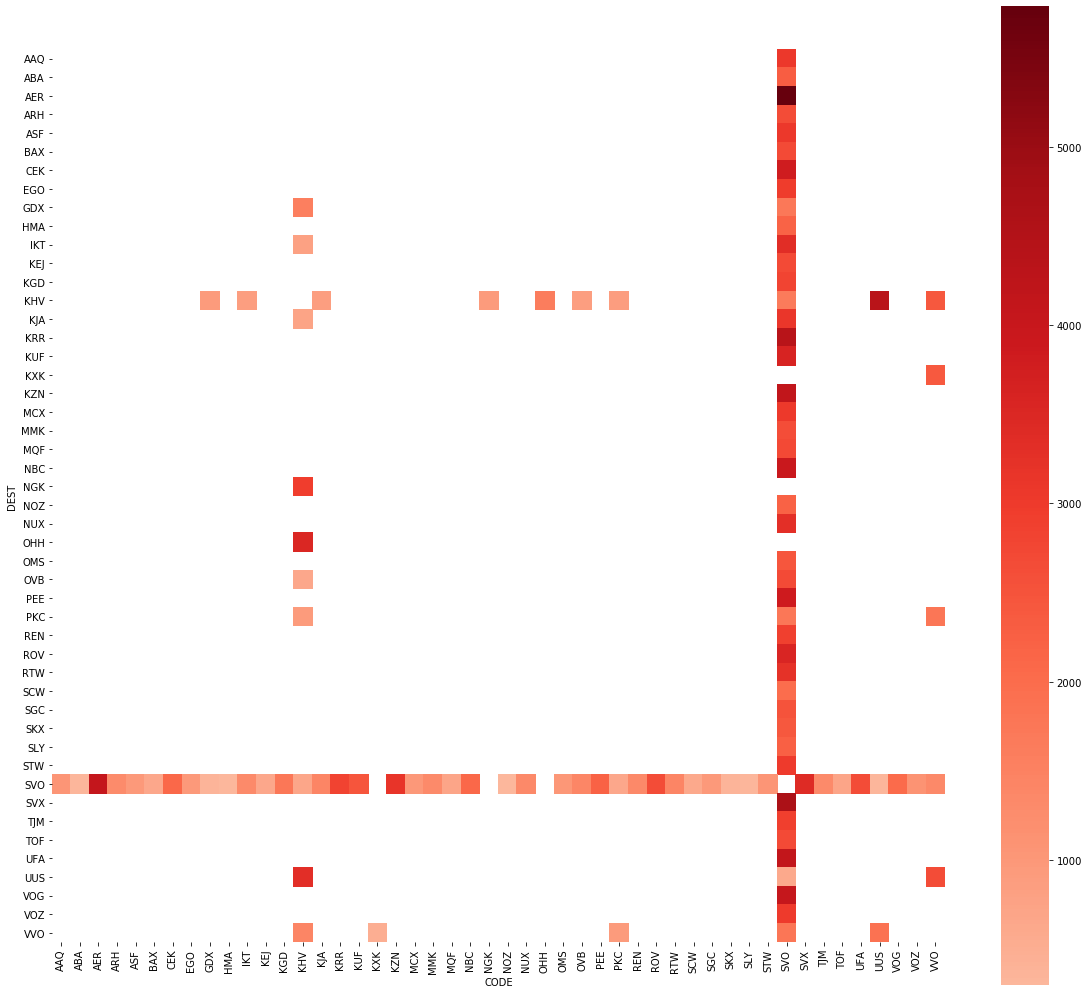

In [18]:
airports_freq_matr = airports_freq.sort_values(by=["COUNT"]).pivot("DEST", "CODE", "COUNT")
# 
plt.figure(figsize=(20, 18))
sns.heatmap(data=airports_freq_matr, cmap="Reds", square=True, center=airports_freq["COUNT"].mean())

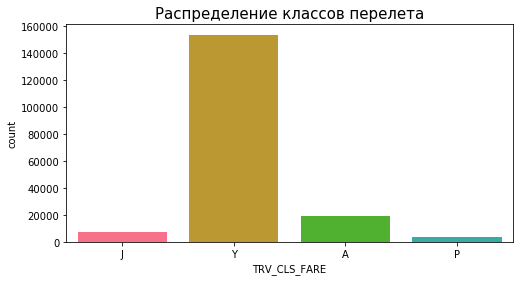

In [19]:
plt.figure(figsize=(8, 4))
plt.title("Распределение классов перелета", fontsize=15)
sns.countplot("TRV_CLS_FARE", data=df, saturation=1)

In [20]:
flighters_freq = df["TRAVEL_DOC"].value_counts()
flighters_freq.describe()

count    83218.000000
mean         2.768692
std          2.532433
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         48.000000
Name: TRAVEL_DOC, dtype: float64

In [21]:
fl_freq_df = pd.DataFrame(np.array(np.unique(flighters_freq, return_counts=True)).T, columns=["FLIGHTS", "FREQUENCY"])

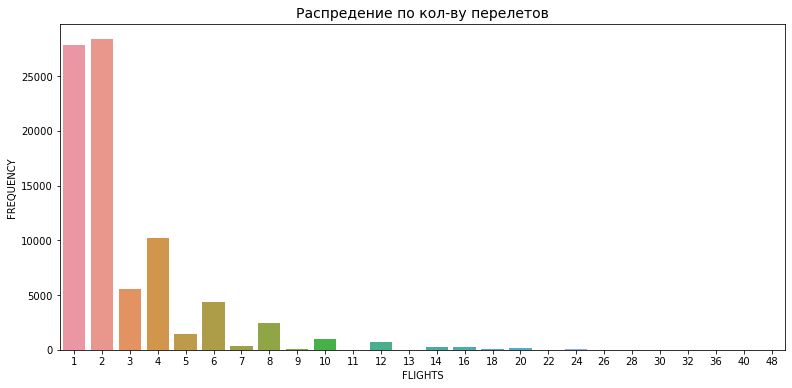

In [22]:
plt.figure(figsize=(13, 6))
plt.title("Распредение по кол-ву перелетов", fontsize=14)
sns.barplot(x="FLIGHTS", y="FREQUENCY", data=fl_freq_df)

### Кол-во перелетов каждого пассажира

In [23]:
# grouped_df = df.groupby(["ARRIVAL_DATE", "ARRIVAL_TIME", "FLIGHT_CODE_SH_FROM"])["TRAVEL_DOC"].size()
# grouped_df = grouped_df.reset_index(name="FLIGHTS")
grouped_df = df.groupby(["TRAVEL_DOC"]).size()

grouped_df = grouped_df.to_frame().reset_index()
grouped_df.columns = ["FLIGHTER_DOC", "FLIGHTS"]
# grouped_df.dropna(axis=1, how="all")
grouped_df.head()

,FLIGHTER_DOC,FLIGHTS
0,00 0136438,1
1,00 0213523,8
2,00 0288744,2
3,00 0342340,2
4,00 0350841,1


### Соединение кол-ва перелетов с пассажирами в основном источнике

In [24]:
merged_df = pd.merge(df, grouped_df, left_on="TRAVEL_DOC", right_on="FLIGHTER_DOC", how="inner")
merged_df = merged_df.drop(columns=["FLIGHTER_DOC"])
merged_df = merged_df.dropna()
merged_df

,PAX_NAME,PATERNITY,DEPART_TIME,ARRIVAL_DATE,ARRIVAL_TIME,FLIGHT_CODE_SH_FROM,DEST,CODE,TICKET,TRAVEL_DOC,MEAL,TRV_CLS_FARE,BAGGAGE,AGENT_INFO,FLIGHTS
3,SAMIR KOLOSOV,TAMERLANOVICH,10:50,2017-05-12,12:30,SU1277NO,KZN,SVO,"1,78E+15",2 244 645 520,FPML,Y,YSTNNF,TRAVELGENIO,5
4,SAMIR KOLOSOV,TAMERLANOVICH,6:40,2017-12-29,11:10,SU1434NO,SVO,MQF,"5,00E+15",2 244 645 520,LCML,Y,YGRPBV,GO2SEE,5
32,LYUBOV ERSHOVA,ZAKHAROVNA,10:25,2017-02-26,13:25,SU5610NO,VVO,UUS,"7,95E+15",776 380 126,VGML,Y,YRSTSC1PC,ONETWOTRIP,3
33,LYUBOV ERSHOVA,ZAKHAROVNA,9:30,2017-03-23,11:30,SU1159NO,ROV,SVO,"1,50E+15",776 380 126,KSML,Y,YSTNSX,TICKETS.RU,3
41,SAMIR BARSUKOV,GORDEEVICH,6:25,2017-02-04,6:40,SU1235NO,UFA,SVO,"9,53E+15",78 271 703,VGML,A,ASTNXK0PC,EDREAMS,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230358,VALERIIA KUZNETSOVA,IGOREVNA,16:35,2017-03-31,18:00,SU5602NO,VVO,KHV,"9,76E+15",855 917 005,HNML,Y,YFLXVI,TICKETS.RU,2
230365,GEORGIY SOKOLOV,DMITRIEVICH,15:50,2017-02-05,17:30,SU5613NO,GDX,KHV,"3,28E+15",687 189 998,HNML,Y,YGRPMN1PC,TRIP.RU,2
230366,GEORGII SOKOLOV,DMITRIEVICH,15:50,2017-02-05,17:30,SU5613NO,GDX,KHV,"3,28E+15",687 189 998,HNML,Y,YGRPMN1PC,TRIP.RU,2
230374,NINA KLYUEVA,LVOVNA,18:55,2017-01-16,20:20,SU1375NO,EGO,SVO,"2,32E+15",3 413 501 203,LCML,Y,YRSTDW1PC,GO2SEE,1


In [25]:
# write_path = "normal_data\\Sirena-export_copy_NORMAL.csv"
# merged_df.to_csv(write_path, sep=';')